In [1]:
import nltk
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# nltk.download('punkt')
# nltk.download("stopwords")
# nltk.download('wordnet')
os.chdir("../..")

### Load data

In [2]:
df = pd.read_csv("data/processed/counsel-chat-best-answer.csv")
df.head()

,questionID,questionTitle,questionText,topic,answerText,upvotes,views
0,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,depression,It is very common for people to have multiple ...,3,1971
1,1,My apartment manager won't let me keep an emot...,I have been diagnosed with general anxiety and...,depression,"This can be a difficult situation. Typically,...",2,1026
2,2,I feel like my mother doesn't support me,My mother is combative with me when I say I do...,depression,Do you live with your mom and have constant in...,2,187
3,3,Why do I feel like I don't belong anywhere?,There are many people willing to lovingly prov...,depression,I truly understand what you are saying. I want...,1,62
4,4,How can I help my girlfriend?,My girlfriend just quit drinking and she becam...,depression,You're probably not going to like my answer.Yo...,3,824


In [13]:
topics = [
    topic 
    for topic, count in df.groupby("topic").count()["questionText"].to_dict().items()
    if count > 25
]
topics

['anxiety',
 'depression',
 'family-conflict',
 'intimacy',
 'parenting',
 'relationships',
 'self-esteem']

### Pre-process data

In [4]:
def process_text(text):
    
    # convert to lower case
    text = text.lower()
    
    # remove punctuations
    text = re.sub(r"(\W|_)+", " ", text)
    
    # remove stopwords
    for stopword in stopwords.words("english"):
        text = re.sub(r"\s" + stopword + r"\s", " ", " " + text)
    
    return text.strip()

In [5]:
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    text = " ".join([
        lemmatizer.lemmatize(word) for word in word_tokenize(text)
    ])
    return text

In [6]:
df["questionTextProcessed"] = df["questionText"].apply(process_text)
df["questionTextLemm"] = df["questionTextProcessed"].apply(lemmatization)
df[["questionText", "questionTextProcessed", "questionTextLemm"]].head()

,questionText,questionTextProcessed,questionTextLemm
0,I have so many issues to address. I have a his...,many issues address history sexual abuse breas...,many issue address history sexual abuse breast...
1,I have been diagnosed with general anxiety and...,diagnosed general anxiety depression family do...,diagnosed general anxiety depression family do...
2,My mother is combative with me when I say I do...,mother combative say want talk depression supp...,mother combative say want talk depression supp...
3,There are many people willing to lovingly prov...,many people willing lovingly provide home food...,many people willing lovingly provide home food...
4,My girlfriend just quit drinking and she becam...,girlfriend quit drinking became really depress...,girlfriend quit drinking became really depress...


In [7]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("corpora")

'corpus'

### Generate wordcloud

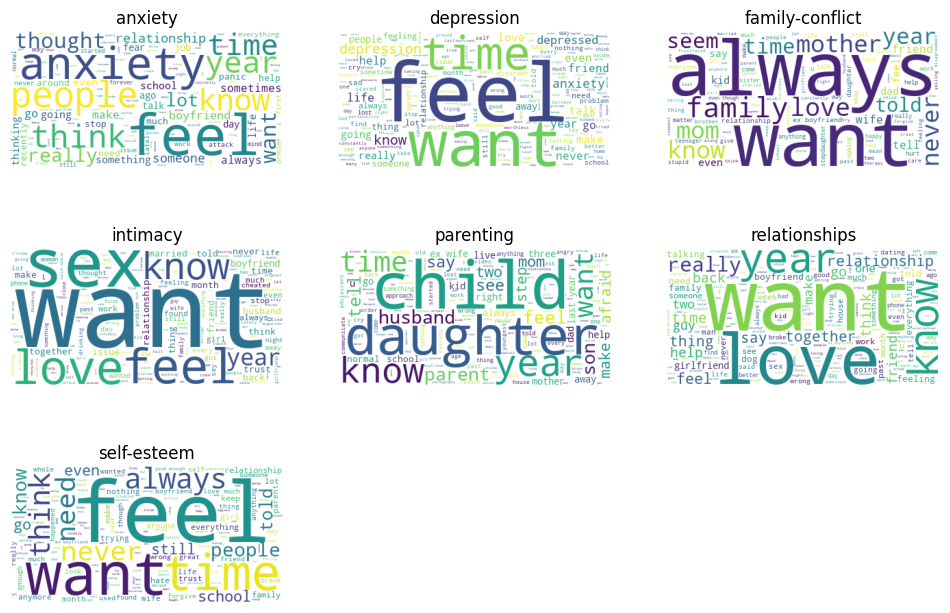

In [14]:
fig = plt.figure(figsize=(12, 8))
for i, topic in enumerate(topics):
    fig.add_subplot(3, 3, i+1)
    texts = df[df.topic == topic]["questionTextLemm"]
    wordcloud = WordCloud(background_color="white").generate(
        " ".join(texts)
    )
    plt.imshow(wordcloud)
    plt.title(topic)
    plt.axis("off")
plt.show()